In [13]:
import itertools
import os
import sqlite3
import pandas as pd
import numpy as np
os.chdir(r'C:\Users\jdivers\PycharmProjects\monte_carlo\data\databases')

In [14]:
def fetch_data(db_path, simulation_id):
    conn = sqlite3.connect(db_path)
    query = f"SELECT mu_s, mu_a, g, reflectance FROM mclut WHERE simulation_id = {simulation_id}"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df


In [15]:
df = fetch_data('lut.db', 78)
df

,mu_s,mu_a,g,reflectance
0,0.0,1.0,0.9,0.000000
1,0.0,2.0,0.9,0.000000
2,0.0,3.0,0.9,0.000000
3,0.0,4.0,0.9,0.000000
4,0.0,5.0,0.9,0.000000
...,...,...,...,...
10196,100.0,97.0,0.9,0.000219
10197,100.0,98.0,0.9,0.000218
10198,100.0,99.0,0.9,0.000225
10199,100.0,100.0,0.9,0.000229


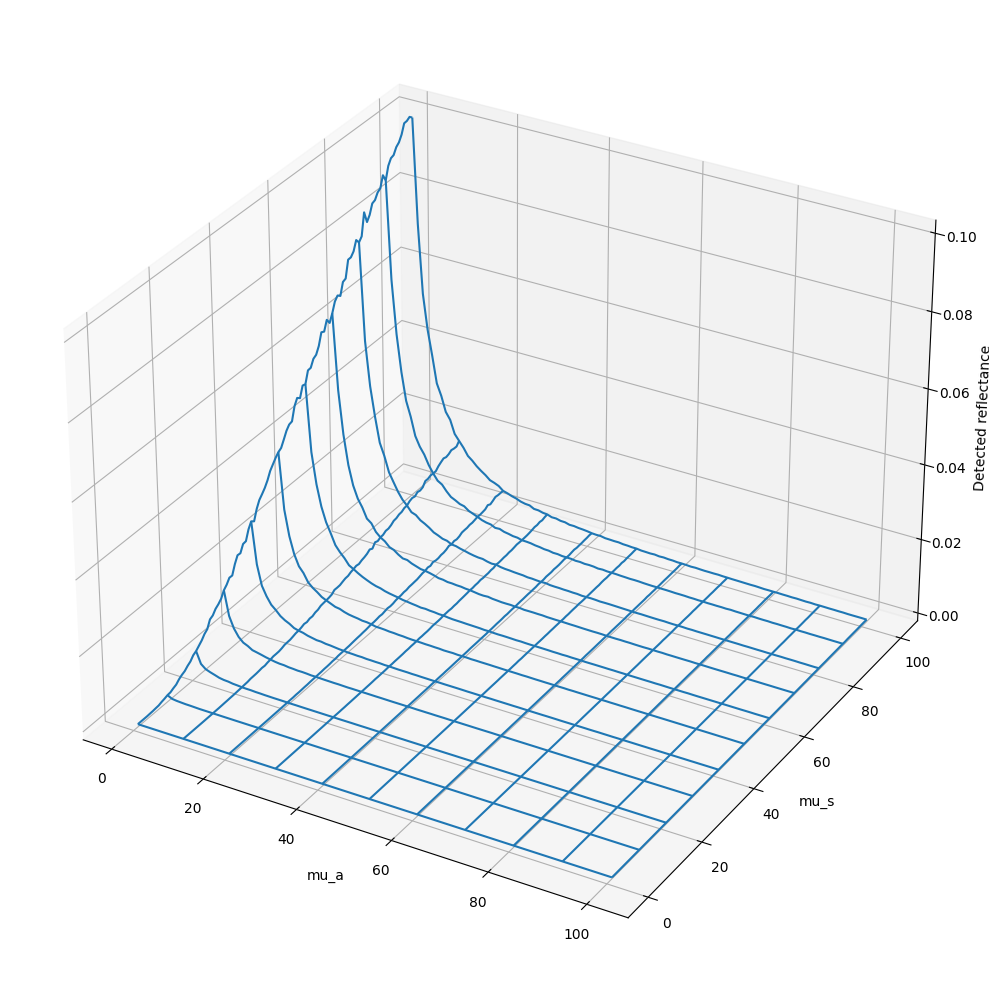

In [18]:
x = df['mu_s'].unique()
y = df['mu_a'].unique()
X, Y = np.meshgrid(x, y, indexing='ij')
Z = np.reshape(df['reflectance'], (len(x), len(y)))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(Y, X, Z, rstride=10, cstride=10)
# ax.invert_yaxis()
ax.set_xlabel('mu_a')
ax.set_ylabel('mu_s')
ax.set_zlabel('Detected reflectance')
fig.tight_layout()
plt.show()

## Comparison to diffusion approximation

In [ ]:
from tqdm import tqdm

mu_s_array = np.arange(0, 50, 1)
mu_a_array = np.arange(1, 50, 1)
tissue_n = 1.33
collection_n = 1.33
for mu_s, mu_a in tqdm(itertools.product(mu_s_array, mu_a_array), 
                       desc='Diffusion approximation', total=len(mu_s_array) * len(mu_a_array)):
    R = diffusion_appoximation(mu_s=mu_s, mu_a=mu_a, n_tissue=tissue_n, n_collection=collection_n)